In [1]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [2]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Getting our data ready to be used with machine learning
 <br> <br>
Three main things we have to do : <br>
    1. Split the data into features and labels (usually "X" & "y") <br>
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
# Classification data
heart_disease = pd.read_csv('https://raw.githubusercontent.com/jeong-wooseok/zero-to-mastery-ml/master/data/heart-disease.csv')

In [5]:
# Split data into X & y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

In [6]:
# SPlit the data into train, test data

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [7]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [8]:
len(heart_disease),X.shape

(303, (303, 13))

### 1.1 Make sure it's all numerical

In [9]:
car_sales = pd.read_csv('https://raw.githubusercontent.com/jeong-wooseok/zero-to-mastery-ml/master/data/car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [10]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [11]:
# car_sales.Price = car_sales.Price.apply(lambda x : x.replace("$","")).apply(lambda x : x.replace(",","")).apply(lambda x : x.replace("$","")).apply(lambda x : x.replace(".00",""))
# car_sales.Price = car_sales.Price.astype(int)

In [12]:
# Split into X, y
X = car_sales.drop("Price", axis=1)
y = car_sales['Price']

In [13]:
# Split Train data, Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [14]:
X_train, y_train

(       Make Colour  Odometer (KM)  Doors
 493   Honda   Blue          42420      4
 737  Toyota   Blue         223875      4
 982   Honda  White         238172      4
 771   Honda  White         136340      4
 631  Nissan  Green          87701      4
 ..      ...    ...            ...    ...
 138  Toyota    Red         133195      4
 200  Nissan  White          66461      3
 231   Honda    Red         120306      4
 662   Honda  White         236432      4
 341  Toyota  White         119439      4
 
 [700 rows x 4 columns],
 493     7376
 737    12650
 982    13273
 771    19271
 631    29656
        ...  
 138    14795
 200    25873
 231    18346
 662     7496
 341    17340
 Name: Price, Length: 700, dtype: int64)

In [15]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(X_train,y_train)


In [16]:
# making str to numeric features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,35820.0,4.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,155144.0,3.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,66604.0,4.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,215883.0,4.0


In [17]:
# makes pandas to to numeric encoding
# dummies = pd.get_dummies(car_sales[['Make','Colour']])
dummies = pd.get_dummies(car_sales)
dummies

,Odometer (KM),Doors,Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,35431,4,15323,0,1,0,0,0,0,0,0,1
1,192714,5,19943,1,0,0,0,0,1,0,0,0
2,84714,4,28343,0,1,0,0,0,0,0,0,1
3,154365,4,13434,0,0,0,1,0,0,0,0,1
4,181577,3,14043,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820,4,32042,0,0,0,1,1,0,0,0,0
996,155144,3,5716,0,0,1,0,0,0,0,0,1
997,66604,4,31570,0,0,1,0,0,1,0,0,0
998,215883,4,4001,0,1,0,0,0,0,0,0,1


In [18]:
# Let's refit the model
X = dummies.drop('Price',axis=1)
y = dummies['Price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=14)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=14)

In [19]:
model.score(X_test,y_test)

0.12346826628249519

In [20]:
np.random.seed(42)
for i in range(1,100):
    print(f'Trying model with {i} estimators...')
    rgs = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on the test set :{round(rgs.score(X_test,y_test)*100,2)}%')
    print("")                                
    

Trying model with 1 estimators...
Model accuracy on the test set :-40.98%

Trying model with 2 estimators...
Model accuracy on the test set :-15.29%

Trying model with 3 estimators...
Model accuracy on the test set :1.01%

Trying model with 4 estimators...
Model accuracy on the test set :1.61%

Trying model with 5 estimators...
Model accuracy on the test set :7.57%

Trying model with 6 estimators...
Model accuracy on the test set :5.92%

Trying model with 7 estimators...
Model accuracy on the test set :12.32%

Trying model with 8 estimators...
Model accuracy on the test set :10.35%

Trying model with 9 estimators...
Model accuracy on the test set :13.5%

Trying model with 10 estimators...
Model accuracy on the test set :21.67%

Trying model with 11 estimators...
Model accuracy on the test set :9.69%

Trying model with 12 estimators...
Model accuracy on the test set :6.53%

Trying model with 13 estimators...
Model accuracy on the test set :16.73%

Trying model with 14 estimators...
Mode

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [21]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/jeong-wooseok/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [22]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1 : Fill missing data with Pandas

In [23]:
# Fill the 'Make'colmns
car_sales_missing['Make'].fillna('missing',inplace=True)

In [24]:
car_sales_missing['Colour'].fillna('missing',inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean,inplace=True)
car_sales_missing['Doors'].fillna(4,inplace=True)

In [25]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [26]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [27]:
len(car_sales_missing)

950

In [28]:
X = car_sales_missing.drop('Price', axis =1)
y = car_sales_missing['Price']

In [29]:
import pandas as pd
p = './exported-car-sales.csv'
pd.read_csv('./exported-car-sales.csv',encoding='euc-kr')

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [30]:
# making str to numeric features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 4.0],
       [1.0, 0.0, 0.0, ..., 0.0, 192714.0, 5.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 4.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 4.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 4.0]], dtype=object)

In [31]:
transformed_X.shape

(950, 13)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 13), (190, 13), (760,), (190,))

In [34]:
# model = RandomForestRegressor(n_estimators=14)
# model.fit(X_train,y_train)


In [35]:
X_train

array([[0.0, 0.0, 0.0, ..., 0.0,
        <bound method NDFrame._add_numeric_operations.<locals>.mean of 0       35431.0
        1      192714.0
        2       84714.0
        3      154365.0
        4      181577.0
                 ...
        995     35820.0
        996    155144.0
        997     66604.0
        998    215883.0
        999    248360.0
        Name: Odometer (KM), Length: 1000, dtype: object>                             ,
        4.0],
       [0.0, 0.0, 0.0, ..., 0.0, 163453.0, 4.0],
       [0.0, 0.0, 0.0, ..., 1.0, 204213.0, 4.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 146824.0, 4.0],
       [1.0, 0.0, 0.0, ..., 0.0, 173915.0, 5.0],
       [0.0, 0.0, 1.0, ..., 0.0, 179666.0, 4.0]], dtype=object)

#### Option2. Fill missing values with Scikit-learn

In [36]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/jeong-wooseok/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [39]:
# fill missing values with Scikit Learn
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numecical valeus with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [40]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           950 non-null    object
 1   Colour         950 non-null    object
 2   Doors          950 non-null    object
 3   Odometer (KM)  950 non-null    object
dtypes: object(4)
memory usage: 29.8+ KB


In [41]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [42]:
car_sales_filled.iloc[:,2:4] = car_sales_filled.iloc[:,2:4].astype(float)

In [43]:
car_sales_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           950 non-null    object
 1   Colour         950 non-null    object
 2   Doors          950 non-null    object
 3   Odometer (KM)  950 non-null    object
dtypes: object(4)
memory usage: 29.8+ KB


In [44]:
# making str to numeric features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [45]:
# Now we've got our data as numbers and filled (no missing value)
# Let's fit a model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=34)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.221617321103303

In [46]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [47]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 2. Choose the right estimator/algorithm for our problems
somethings to note:

* SKlearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a categoty (heart disease or not)
    * Somtimes you'll see 'clf' (short for classifier) used as a classification estimator
* Regression problem - predicting a number (Selling price of a car)


If you're working on a machine learning problem and looking to use sklearn and not sure what model you should choose,
refer to the map

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
![](https://scikit-learn.org/stable/_static/ml_map.png)

### 2.1 Picking a machine learning model for regression problem

Let's use the California Housing dataset.

In [48]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [49]:
housing_df = pd.DataFrame(housing['data'],
                         columns =housing['feature_names'] )
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
housing_df['MedHouseVal'] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [51]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing['data']
y = housing['target']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train,y_train)

# Check the score of the model (on the test data)
model.score(X_test,y_test)

0.5758549611440142

What if 'Ridge' doesn't work or doesn't fit our needs?

we could always try a different model...

How about we try an ensemble model ?
(An Ensemble is the combination of smaller models)

SKlearn's ensemnle models can be found here:

http://scikit-learn.org/stable/modules/ensemble.html

In [52]:
# RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8065734772187598

### 2.2 Choosing an estimator for a classification problem

Let's go to the map... http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [53]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/jeong-wooseok/zero-to-mastery-ml/master/data/heart-disease.csv')
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Consulting the map and it says to try LinearSVC

In [54]:
from sklearn.svm import LinearSVC

# Setup randome seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [55]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [56]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods
    2. If you haver unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm and use it to make predictions on our data

### 3.1 Fitting the model to the data

X = features, features variables, data <br>
y = labels, targets, target variables

In [57]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (Training ML model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)


0.8524590163934426

In [58]:
X.head(),y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

##### Random Forest Model Deep Dive

These resources will help you understand what's happening inside the Random Forest models
we've been using

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Will Cohenson](https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d)


### 3.2 Make predictions using a machine learning model

2ways to make predictions:

1. predict()
2. predict_proba()

In [59]:
# # Use a trained model to predict
# clf.predict(np.array([1,2,2,3]))#this doesn't work

In [60]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [62]:
clf.score(X_test,y_test) # shift+tab으로 내용 확인해보자

0.8524590163934426

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with predict_proba()

In [64]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [65]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [66]:
X_test[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [67]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [68]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [69]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Creat the data
X = housing_df.drop("MedHouseVal",axis=1)
y = housing_df["MedHouseVal"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2)
# Create the instance
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)



In [70]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [71]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

## 4. Evaluting a machine learning model

Three ways to evaluate Scikit Learn models/estimators :

1. Estimators built-in 'score()' method
2. The 'scoring' parameter
3. Problem-specific metric functions

[You can read more about these here](http://scikit-learn.org/stable/modules/model_evaluation.html)

### 4.1 Evaluating a model with the score method

In [73]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.2)

    
# Create Instance
model = RandomForestClassifier(n_estimators=5)

# Train the model
model.fit(X_train, y_train)

# Pred
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

# n=1
# for i in range(100):
    
#     # Create Instance
#     model = RandomForestClassifier(n_estimators=n)

#     # Train the model
#     model.fit(X_train, y_train)

#     # Pred
#     y_pred = model.predict(X_test)

#     print("n: ", n,":", model.score(X_test, y_test))
    
#     n+= 1


0.7530864197530864


In [74]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [76]:
np.array(y_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

In [77]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test,y_test)

0.7530864197530864

### 4.2 Evaluating a model using the scoring parameter
[Scoring Parameter](https://scikit-learn.org/0.15/modules/model_evaluation.html)

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.2)

# Create Instance
clf = RandomForestClassifier(n_estimators=100)

# Train the model
clf.fit(X_train, y_train)

# Pred
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.7530864197530864


In [79]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [80]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [81]:
np.random.seed(42)

# Single traing sco
clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score,clf_cross_val_score

(0.831275720164609, 0.8248087431693989)

#### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification report

##### Accuracy

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score_hd = cross_val_score(clf,X,y)

In [83]:
print(f"Heart Disease Classifier Cross Validation Accurracy : \
      {np.mean(cross_val_score_hd) * 100:.2f}%")

Heart Disease Classifier Cross Validation Accurracy :       82.48%


##### Area under ROC Curve

* Area under curve (AUC)
* Receiver Operation Characteristic curve (ROC)

ROC curves are a comparison of a model's true positive rate (tpr)<br>
verses a model's false positive rate (fpr)

In [84]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)
# Make predictions with probability
y_probs =clf.predict_proba(X_test)
y_probs[:10]

array([[0.9 , 0.1 ],
       [0.48, 0.52],
       [0.33, 0.67],
       [0.91, 0.09],
       [0.19, 0.81],
       [0.23, 0.77],
       [0.57, 0.43],
       [0.98, 0.02],
       [0.89, 0.11],
       [0.31, 0.69]])

In [85]:
# Calculate fpr, tpr and thresholds
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [86]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model.
    """
    plt.figure(figsize=(12,12))
    # Plot ROC curve
    plt.plot(fpr, tpr, c = "orange", label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], c = "darkblue", ls = "--", label="Guessing")
    
    # Customize the plot
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic(ROC) curve")
    plt.legend()
    plt.show()
    

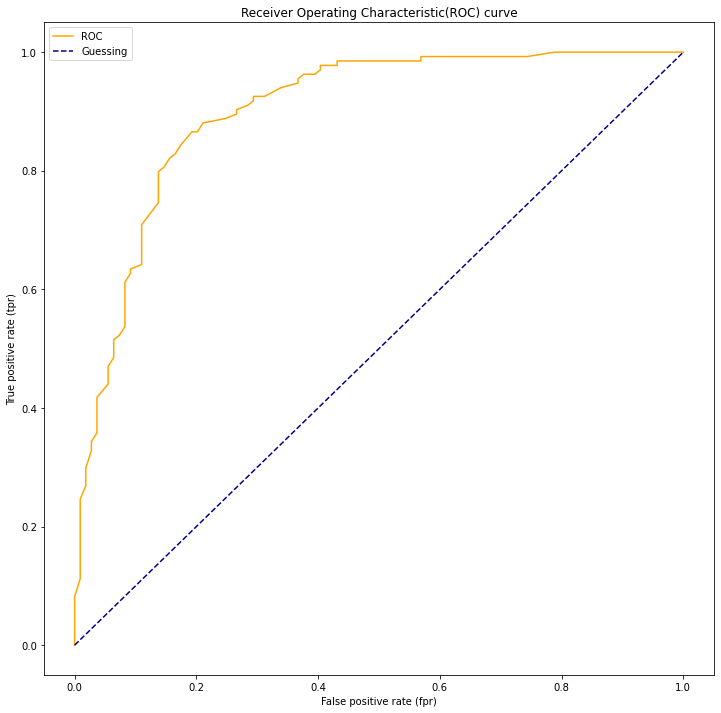

In [87]:
plot_roc_curve(fpr,tpr)

In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9003149390661371

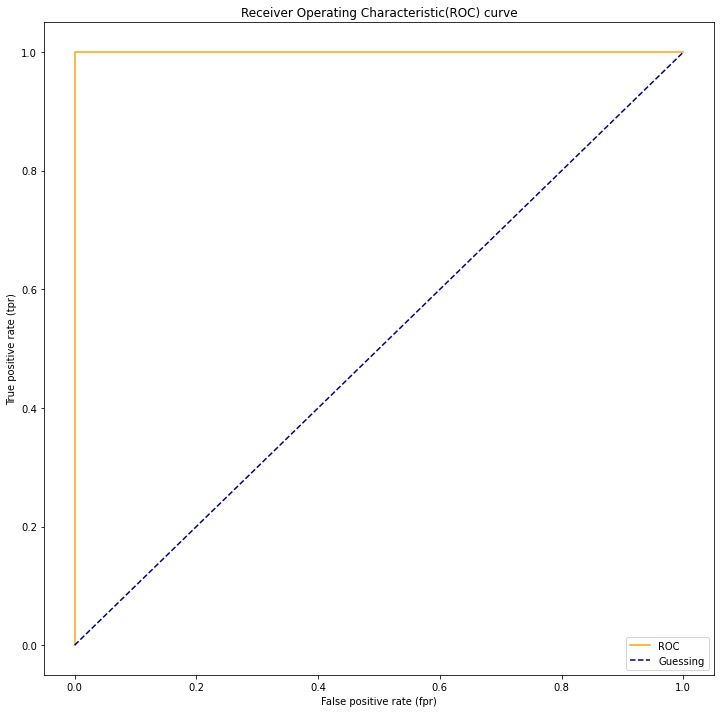

In [89]:
# Plot perfect roc curvew and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [90]:
#Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models <br>(a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) <br>at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes <br>(for example, how well it is at deciding whether someone has heart disease or not). <br>A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

* [ROC and AUC, Clearly Explained! by StatQuest](https://www.youtube.com/watch?v=4jRBRDbJemM)

* [ROC documentation in Scikit-Learn (contains code examples)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

* [How the ROC curve and AUC are calculated by Google's Machine Learning team](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

##### Confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.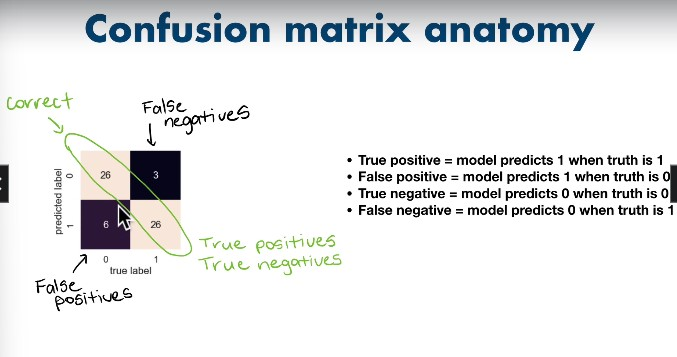

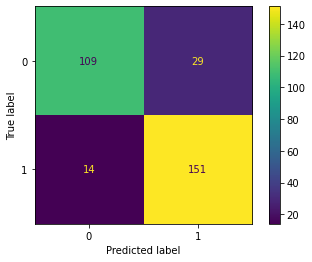

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X,y=y)

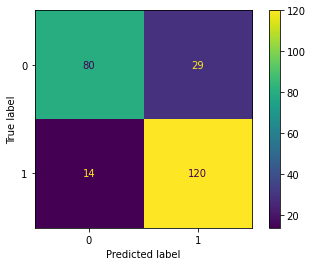

In [98]:
y_preds = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

##### Classification Report

Precision: Accuracy of positive predictions.

* Precision = TP/(TP + FP)

 

Recall: Fraction of positives that were correctly identified.

* Recall = TP/(TP+FN)

 

F1 score

* F1 Score = 2*(Recall * Precision) / (Recall + Precision)

 

Accuracy : (TP+TN) / all

 
macro avg = (normal+abnormal) /2 * precision or recall or f1 score

weighted avg = normal/(normal+abnormal)  *  precision or recall or f1 score

[상세설명](https://velog.io/@ljs7463/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80%EC%A0%95%EB%B0%80%EB%8F%84%EC%9E%AC%ED%98%84%EC%9C%A8f1-score%EB%93%B1)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       109
           1       0.81      0.90      0.85       134

    accuracy                           0.82       243
   macro avg       0.83      0.81      0.82       243
weighted avg       0.83      0.82      0.82       243



In [100]:
pd.DataFrame(classification_report(y_test, 
                                   y_preds,
                                  output_dict=True)).T

,precision,recall,f1-score,support
0,0.851064,0.733945,0.788177,109.000000
1,0.805369,0.895522,0.848057,134.000000
accuracy,0.823045,0.823045,0.823045,0.823045
macro avg,0.828216,0.814734,0.818117,243.000000
weighted avg,0.825866,0.823045,0.821197,243.000000


In [101]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1 # only one positive example

disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True)).T

,precision,recall,f1-score,support
0.0,0.99990,1.0000,0.999950,9999.0000
1.0,0.00000,0.0000,0.000000,1.0000
accuracy,0.99990,0.9999,0.999900,0.9999
macro avg,0.49995,0.5000,0.499975,10000.0000
weighted avg,0.99980,0.9999,0.999850,10000.0000


#### 4.2.2 Regression Model evaluation metrics

[Model evaluation metrics documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
![](http://localhost:8888/files/Desktop/Study/Python/ztm/pictures/lr%20evaluation.jpg?_xsrf=2%7Cfd330b07%7C87d4fcc012a82ba8b2ba1b9de6c9e182%7C1646247877)
The ones we're going to cover are :
1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)

0.8065734772187598

In [103]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [104]:
y_test.mean()

2.0550030959302275

##### R2
is simular to accuracy. It gives a quick indication of how well your model might be doing

$R^2 = 1 - {RSS\over TSS} $

$R^2 = $	coefficient of determination <br>
$RSS = $	sum of squares of residuals <br>
$TSS = $	total sum of squares


In [105]:
from sklearn.metrics import r2_score
# 평균으로 구성된모델의 r2
# fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [106]:
# 완벽한 모델의 r2
r2_score(y_true=y_test,y_pred=y_test)


1.0

In [107]:
r2_score(y_true=y_test,y_pred=y_preds)

0.8065734772187598

$\bar{x} = {1\over n}(x_1+x_2)$

##### MAE 
mean absolute error, absolute differences between prediction and actual values.
It gives you an idea of how wrong your models predictions are.
 
$MAE(y,\widehat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}-1} \left\vert y_i-\widehat{y_i} \right\vert$


In [108]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test,
                    y_pred=y_preds)

0.32659871732073664

In [109]:
df = pd.DataFrame(data = {"actual values": y_test,
                          "predicted values": y_preds})
df["differences"] = df["predicted values"]-df["actual values"]
np.abs(df["differences"]).mean()

0.32659871732073803

##### MSE

mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

If $\widehat{y_i}$ is the predicted value of the $i$-th sample, and 
 $\widehat{y_i}$ is the corresponding true value, then the mean squared error (MSE) estimated over $n_{samples}$
 is defined as  is
 
 $MSE(y,\widehat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}-1} $ 
 $\left(y_i-\widehat{y_i} \right)^2$

In [110]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test,
                   y_pred=y_preds)

0.2534678520824551

In [111]:
df["squard_differences"] = np.square(df["differences"])

In [112]:
df.head()

,actual values,predicted values,differences,squard_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [113]:
df["squard_differences"].mean()

0.25346785208245565

In [114]:
df.shape

(4128, 4)

#### 4.2.3 Finally using the scoring parameter

[Reference](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

clf = RandomForestClassifier()
cv_acc = cross_val_score(clf, X,y, cv=5, scoring=None)
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [116]:
cv_acc = cross_val_score(clf, X,y, cv=5, scoring="accuracy")
cv_acc

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [117]:
print(f"The cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is : 80.18%


In [118]:
cv_precision = cross_val_score(clf, X,y, cv=5, scoring="precision")
cv_precision

array([0.80555556, 0.90322581, 0.83870968, 0.78787879, 0.76923077])

In [119]:
print(f"The cross validated precision is : {np.mean(cv_precision)*100:.2f}%")

The cross validated precision is : 82.09%


In [120]:
cv_recall = cross_val_score(clf, X,y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.84848485])

In [121]:
print(f"The cross validated recall is : {np.mean(cv_recall)*100:.2f}%")

The cross validated recall is : 84.85%


In [122]:
cv_f1 = cross_val_score(clf, X,y, cv=5, scoring="f1")
cv_f1

array([0.86956522, 0.89230769, 0.81818182, 0.85294118, 0.79452055])

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

model = RandomForestRegressor()
cv_r2 = cross_val_score(model,X,y,scoring=None)
cv_r2


array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [124]:
print(f"The cross validated r2 is : {np.mean(cv_r2)*100:.2f}%")

The cross validated r2 is : 65.21%


In [125]:
cv_MAE = cross_val_score(model,X,y,scoring="neg_mean_absolute_error")
cv_MAE

array([-0.53895506, -0.4118183 , -0.43888317, -0.464205  , -0.47454934])

In [126]:
print(f"The cross validated MAE is : {np.mean(cv_MAE)*100:.2f}%")

The cross validated MAE is : -46.57%


In [127]:
cv_MSE = cross_val_score(model,X,y,scoring="neg_mean_squared_error")
cv_MSE

array([-0.52564255, -0.34426975, -0.37057463, -0.44321933, -0.46308691])

In [128]:
print(f"The cross validated MSE is : {np.mean(cv_MSE)*100:.2f}%")

The cross validated MSE is : -42.94%


### 4.3 Using different evaluation metrics as Scikit-Learn functions
the 3rd way to evaluate scikitlearn models/estimators is to use the [sklearn.metrics module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)

print(f"""
accuracy_score: {accuracy_score(y_true=y_test, y_pred=y_preds)*100:0.2f}%,
precision_score: {precision_score(y_true=y_test, y_pred=y_preds)*100:0.2f}%,
recall_score: {recall_score(y_true=y_test, y_pred=y_preds)*100:0.2f}%,
f1_score: {f1_score(y_true=y_test, y_pred=y_preds)*100:0.2f}%""")



accuracy_score: 80.33%,
precision_score: 86.11%,
recall_score: 81.58%,
f1_score: 83.78%


In [130]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(f"""
r2_score: {r2_score(y_true=y_test, y_pred=y_preds)*100:0.2f}%,
mean_absolute_error: {mean_absolute_error(y_true=y_test, y_pred=y_preds)*100:0.2f}%,
mean_squared_error: {mean_squared_error(y_true=y_test, y_pred=y_preds)*100:0.2f}%""")


r2_score: 80.66%,
mean_absolute_error: 32.66%,
mean_squared_error: 25.35%


### Wrap Up



Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

<b>Classification Model Evaluation Metrics/Techniques</b>

* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* Recall (TPR) - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

* ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

* Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

<b> Which classification metric should you use?<b>

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* Precision and recall become more important when classes are imbalanced.

* If false-positive predictions are worse than false-negatives, aim for higher precision.

* If false-negative predictions are worse than false-positives, aim for higher recall.

* F1-score is a combination of precision and recall.

* A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

* R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

* Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

* Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

<b> Which regression metric should you use?<b>

* R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* MAE gives a better indication of how far off each of your model's predictions are on average.

* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

* Pay more attention to MAE: When being USD10,000 off is twice as bad as being USD5,000 off.

* Pay more attention to MSE: When being USD10,000 off is more than twice as bad as being USD5,000 off.

## 5. Improving a model

First predictions = base line predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, teh more, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters vs Hyperparameters
* Parameters = model find these patterns in data
* Hyper Parameters = setting on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhuastively with GridSearchCV

In [131]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameter by hand
![](http://localhost:8888/files/Desktop/Study/Python/ztm/pictures/hp_byhand.jpg?_xsrf=2%7Cfd330b07%7C87d4fcc012a82ba8b2ba1b9de6c9e182%7C1646247877)

Let's make 3sets : training, validation, test<br>
We're going to try and adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [132]:
def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparison on y_true labels vs. y_pred labels
    """
    from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1":round(f1,2)}
    print(f"""
    Acc:{accuracy *100:.2f}%,
    Precision:{precision *100:.2f}%,
    Recall:{recall *100:.2f}%,
    f1:{f1 *100:.2f}%""")
    
    return metric_dict
                   
                    

In [133]:
from sklearn.ensemble import RandomForestClassifier

heart_disease_shuffled = heart_disease.sample(frac=1)
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) #15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics



    Acc:75.56%,
    Precision:69.23%,
    Recall:85.71%,
    f1:76.60%


{'accuracy': 0.76, 'precision': 0.69, 'recall': 0.86, 'f1': 0.77}

In [134]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=70)
clf_2.fit(X_train,y_train)

# make baseline predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the classifier on validation
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics


    Acc:75.56%,
    Precision:67.86%,
    Recall:90.48%,
    f1:77.55%


{'accuracy': 0.76, 'precision': 0.68, 'recall': 0.9, 'f1': 0.78}

In [135]:
np.random.seed(42)

clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(X_train,y_train)

# make baseline predictions
y_preds_3 = clf_3.predict(X_valid)
    
# Evaluate the classifier on validation
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)
clf_3_metrics


    Acc:75.56%,
    Precision:67.86%,
    Recall:90.48%,
    f1:77.55%


{'accuracy': 0.76, 'precision': 0.68, 'recall': 0.9, 'f1': 0.78}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [136]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth" : [None, 5,10,20,30],
        "max_features": ["auto","sqrt"],
        "min_samples_leaf": [2,4,6],
        "min_samples_split":[1,2,4]
       }
np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=1000, #number of models to try
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   n_iter=1000,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [1, 2, 4],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [137]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None}

In [138]:
# Evaluate the predoctiions
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)


    Acc:81.48%,
    Precision:76.69%,
    Recall:94.70%,
    f1:84.75%


### 5.3 Hyperparameter tuning with GridSearchCV

In [139]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4, 6],
 'min_samples_split': [1, 2, 4]}

In [140]:
6*5*2*3*3*5 # 5fold Validation까지 2700번 확인해야하는 RandomizedSearchCV

2700

In [141]:
from sklearn.model_selection import GridSearchCV, train_test_split

grid_2={'n_estimators': [100, 200, 500],
     'max_depth': [10],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [6],
     'min_samples_split': [1, 2]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, #number of models to try
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=200

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [10], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [6], 'min_samples_split': [1, 2],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [142]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 500}

In [143]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test,gs_y_preds)


    Acc:76.95%,
    Precision:74.36%,
    Recall:87.88%,
    f1:80.56%


<AxesSubplot:>

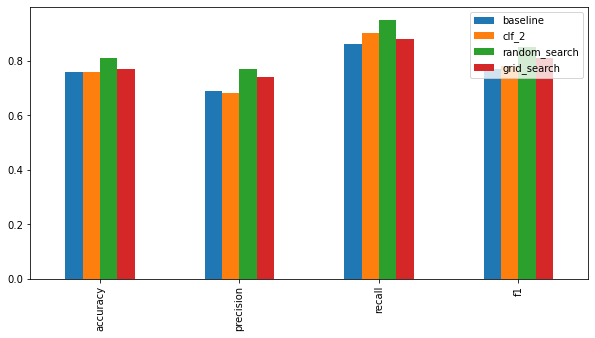

In [144]:
compare_mertrics = pd.DataFrame({"baseline": baseline_metrics,
                                 "clf_2" : clf_2_metrics,
                                 "random_search": rs_metrics,
                                 "grid_search" : gs_metrics})

compare_mertrics.plot.bar(figsize=(10,5))                           
                                 

### Wrap up

The short notebook compares 3 different models on the heart disease dataset.

* A baseline RandomForestClassifier (all default parameters)

* A RandomForestClassifier tuned with RandomizedSearchCV

* A RandomForestClassifier tuned with GridSearchCV

The most important part is they all use the same data splits created using train_test_split() and np.random.seed(42).


## 6. Save and load the trained model

Two ways to save and load machine learning model<br>
가벼울 때는 pickle을, 무거울 때는 joblib를 활용


### 6.1 pickle mode

In [145]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))


In [146]:
# lolad a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [147]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)


    Acc:76.95%,
    Precision:74.36%,
    Recall:87.88%,
    f1:80.56%


{'accuracy': 0.77, 'precision': 0.74, 'recall': 0.88, 'f1': 0.81}

In [148]:
evaluate_preds(y_test, gs_y_preds)


    Acc:76.95%,
    Precision:74.36%,
    Recall:87.88%,
    f1:80.56%


{'accuracy': 0.77, 'precision': 0.74, 'recall': 0.88, 'f1': 0.81}

### 6.2 Joblib

In [149]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [150]:
# import a saved joblib
loaded_joblib_model = load("gs_random_forest_model_1.joblib")

## 7. Putting it all together!

[sklearn pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [151]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [152]:
data = pd.read_csv("https://raw.githubusercontent.com/jeong-wooseok/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
data.head()                   

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [154]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. FIll missing data
2. Convert data to numbets
3. Build a model on the data

In [155]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split,GridSearchCV

np.random.seed(42)

# import data and drop rows with missing labels
data = pd.read_csv("https://raw.githubusercontent.com/jeong-wooseok/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace= True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])
                               
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num",numeric_transformer,numeric_features)
    ])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessing",preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.20234207803323734

In [156]:
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                             

In [157]:
# Use GridSearchCV with our regression pipeline
pipe_grid ={
    "preprocessing__num__imputer__strategy" : ["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
        

In [158]:
gs_model.score(X_test,y_test)

0.2880263495801503

In [159]:
# Use GridSearchCV with our regression pipeline
pipe_grid ={
    "preprocessing__num__imputer__strategy" : ["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split": [2,4]
}

rs_model = RandomizedSearchCV(model, pipe_grid, n_iter=100,cv=5, verbose=2)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Make',
                                                                                'Colour']),
                             

In [160]:
rs_model.score(X_test,y_test)

0.2643973783244674

## Scikit-Learn Practice
In this assignment, you'll get hands-on with a notebook which has a series of exercises based on the Scikit-Learn code and concepts we went through in the previous videos.

Download the Scikit-Learn exercises and solutions notebooks from GitHub and work through each cell in the exercises notebook using what you've learned in the previous videos.

* [Scikit-Learn Exercises notebook](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/scikit-learn-exercises.ipynb)



* [Scikit-Learn Exercises Solutions notebook (avoid looking at this for as long as possible)](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/scikit-learn-exercises-solutions.ipynb)

Don't forget, if you get stuck, there's plenty of help available!

Remember, you should always try to run the code yourself first.

If you're still stuck feel free to ask the Discord server (Checkout the #machinelearning-datascience channel for help) or search the internet for answers.

Note: In the notebook, there may be instructions to import a file from a file path such as "../data/car-sales.csv", you should change these to wherever you're storing "car-sales.csv". Or the direct link on GitHub (in raw format), such as, https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv.

https://scikit-learn.org/stable/getting_started.html
After working through the Scikit-Learn exercises notebook, how did you go?

Again, whether you blazed through them all or got stuck multiple times and had to look at the documentation or go back to the lectures, it's all part of the process.

Practising different exercises and writing code on your own is the best way to practice different concepts.